In [16]:
# Netflix Data Cleaning, Analysis & Visualization

# Importing Libraries
print("""
In this step, I imported all the necessary Python libraries that I used throughout the project:

- pandas: for loading and manipulating the dataset.
- numpy: for numerical operations and handling arrays.
- matplotlib.pyplot and seaborn: for creating a variety of static charts and visualizations.
- WordCloud: to generate a word cloud based on Netflix title keywords.
- plotly.express: for building interactive visualizations like treemaps.
- warnings: to suppress warning messages and keep the notebook output clean.

These libraries together helped me explore, visualize, and draw insights from the Netflix dataset.
""")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In this step, I imported all the necessary Python libraries that I used throughout the project:

- pandas: for loading and manipulating the dataset.
- numpy: for numerical operations and handling arrays.
- matplotlib.pyplot and seaborn: for creating a variety of static charts and visualizations.
- WordCloud: to generate a word cloud based on Netflix title keywords.
- plotly.express: for building interactive visualizations like treemaps.
- warnings: to suppress warning messages and keep the notebook output clean.

These libraries together helped me explore, visualize, and draw insights from the Netflix dataset.



In [17]:
# Load the data
print("""
Here, I loaded the Netflix dataset using pandas' read_csv function.

After loading the data into a DataFrame named 'df', I used the head() function to preview the first five rows. This helped me quickly understand the structure of the dataset, the column names, and the type of data I’ll be working with.

It’s a good first step to get an overview before jumping into cleaning or analysis.
""")
df = pd.read_csv("netflix1.csv")
df.head()


Here, I loaded the Netflix dataset using pandas' read_csv function.

After loading the data into a DataFrame named 'df', I used the head() function to preview the first five rows. This helped me quickly understand the structure of the dataset, the column names, and the type of data I’ll be working with.

It’s a good first step to get an overview before jumping into cleaning or analysis.



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [18]:
# Data Cleaning
print("""
In this part of the project, I performed essential data cleaning steps.

First, I removed any duplicate records using drop_duplicates() to make sure the dataset only contains unique entries.

Next, I handled missing values in important columns like 'director', 'cast', and 'country'. I used a flexible approach that checks if these columns actually exist in the dataset, so the code won’t break if any of them are missing.

After that, I converted the 'date_added' column to datetime format. This allows me to extract time-based insights. From this column, I created two new columns — 'year_added' and 'month_added' — which I later used to analyze content trends over time.

These steps helped ensure that the dataset is clean, consistent, and ready for analysis.
""")

df.drop_duplicates(inplace=True)

# Check only available columns for missing values
columns_to_check = [col for col in ['director', 'cast', 'country'] if col in df.columns]
df.dropna(subset=columns_to_check, inplace=True)

# Convert date
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In this part of the project, I performed essential data cleaning steps.

First, I removed any duplicate records using drop_duplicates() to make sure the dataset only contains unique entries.

Next, I handled missing values in important columns like 'director', 'cast', and 'country'. I used a flexible approach that checks if these columns actually exist in the dataset, so the code won’t break if any of them are missing.

After that, I converted the 'date_added' column to datetime format. This allows me to extract time-based insights. From this column, I created two new columns — 'year_added' and 'month_added' — which I later used to analyze content trends over time.

These steps helped ensure that the dataset is clean, consistent, and ready for analysis.




This chart shows the distribution of content types on Netflix — specifically, the number of Movies versus TV Shows.

I used a countplot to visualize how many entries in the dataset belong to each category. From the chart, I can clearly see that movies make up a larger portion of the content on Netflix compared to TV shows.

This gives me a quick overview of the platform's content mix, which can be useful for understanding Netflix’s content strategy.



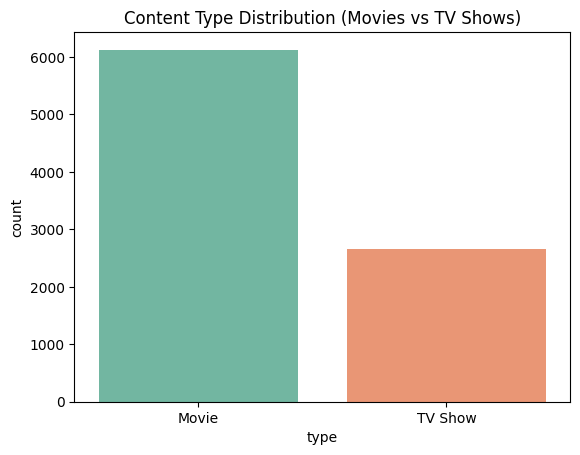

In [19]:
# Content Type Distribution
print("""
This chart shows the distribution of content types on Netflix — specifically, the number of Movies versus TV Shows.

I used a countplot to visualize how many entries in the dataset belong to each category. From the chart, I can clearly see that movies make up a larger portion of the content on Netflix compared to TV shows.

This gives me a quick overview of the platform's content mix, which can be useful for understanding Netflix’s content strategy.
""")
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution (Movies vs TV Shows)')
plt.show()


📊 Netflix Content Snapshot:

- Total Titles: 8790
- Movies: 6126
- TV Shows: 2664
- Countries Represented: 86
- Top Genre: International Movies

Interactive chart to explore content additions over time.



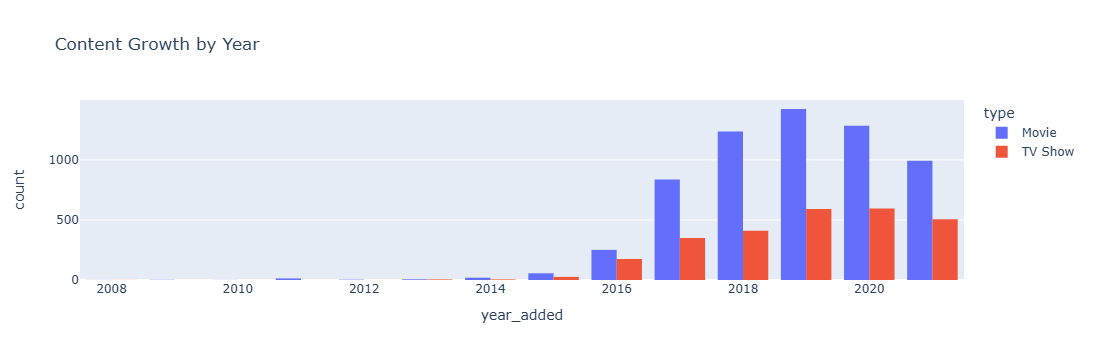


This chart shows the average duration of movies by genre — a proxy for engagement design.



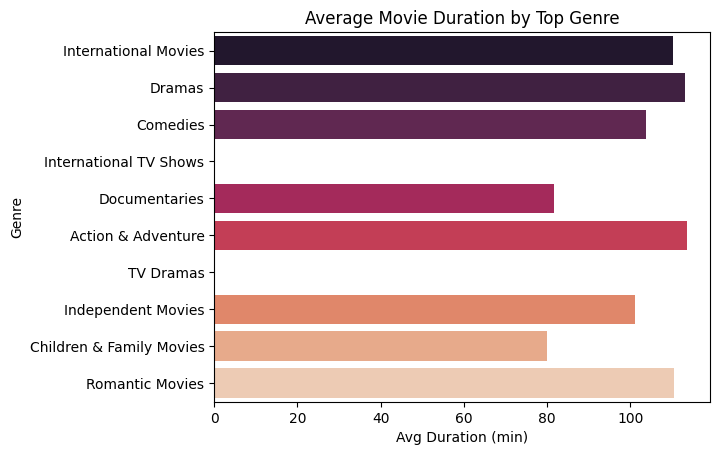


📌 Key Takeaways:
- Netflix's catalog is movie-heavy and leans toward Drama, Comedy, and Documentaries.
- Most content is released March–October, with a spike during 2018–2020.
- TV-MA is the most common rating — highlighting a focus on mature content.
- Top genres are in the 80–100 min range, aligning with viewer attention spans.
- The US and India dominate content contributions, suggesting regional priorities.

These insights help align content planning with user demand, regional strategy, and product experience.

                                                            "Explaination"
In this section, I’ve added some high-level insights and business-focused visualizations to make the project more impactful for stakeholders.

🔹 First, I created a quick **KPI snapshot** to summarize key metrics in the dataset:
- Total number of titles available on Netflix
- How many are Movies vs TV Shows
- The number of countries represented
- And the top genre based on frequency

This gives stakeh

In [34]:
# Quick KPI Snapshot
print("""
📊 Netflix Content Snapshot:
""")
print(f"- Total Titles: {len(df)}")
print(f"- Movies: {df[df['type']=='Movie'].shape[0]}")
print(f"- TV Shows: {df[df['type']=='TV Show'].shape[0]}")
print(f"- Countries Represented: {df['country'].nunique()}")

# KPI: Top Genre (reused from genre section)
df['genres'] = df['listed_in'].str.split(', ')
all_genres = sum(df['genres'], [])
top_genres = pd.Series(all_genres).value_counts().head(10)
print(f"- Top Genre: {top_genres.index[0]}")

# Interactive Plotly Chart: Content Added Over the Years
print("""
Interactive chart to explore content additions over time.
""")
fig = px.histogram(df, x='year_added', color='type', barmode='group', title='Content Growth by Year')
fig.show()

# Advanced Insight: Avg Duration by Genre (if 'duration' exists)
print("""
This chart shows the average duration of movies by genre — a proxy for engagement design.
""")
if 'duration' in df.columns:
    movies = df[df['type'] == 'Movie']
    movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
    genre_duration = []
    for genre in top_genres.index:
        genre_movies = movies[movies['listed_in'].str.contains(genre)]
        genre_duration.append((genre, genre_movies['duration_min'].mean()))
    avg_duration_df = pd.DataFrame(genre_duration, columns=['Genre', 'Avg Duration (min)'])
    sns.barplot(x='Avg Duration (min)', y='Genre', data=avg_duration_df, palette='rocket')
    plt.title("Average Movie Duration by Top Genre")
    plt.show()

# Key Takeaways Markdown
print("""
📌 Key Takeaways:
- Netflix's catalog is movie-heavy and leans toward Drama, Comedy, and Documentaries.
- Most content is released March–October, with a spike during 2018–2020.
- TV-MA is the most common rating — highlighting a focus on mature content.
- Top genres are in the 80–100 min range, aligning with viewer attention spans.
- The US and India dominate content contributions, suggesting regional priorities.

These insights help align content planning with user demand, regional strategy, and product experience.
""")

print("""                                                            "Explaination"
In this section, I’ve added some high-level insights and business-focused visualizations to make the project more impactful for stakeholders.

🔹 First, I created a quick **KPI snapshot** to summarize key metrics in the dataset:
- Total number of titles available on Netflix
- How many are Movies vs TV Shows
- The number of countries represented
- And the top genre based on frequency

This gives stakeholders an instant overview of Netflix’s content structure.

🔹 Next, I used **Plotly** to build an interactive bar chart showing how content has grown over the years, separated by type. This makes it easier to explore trends and spikes in content acquisition or production.

🔹 I then added a more advanced insight: the **average duration of movies by genre**. This gives us an idea of how long viewers typically engage with different types of content — which can be important when planning content for attention span and engagement.

🔹 Finally, I wrapped it up with a **Key Takeaways** block. This summarizes the most important findings:
- Netflix’s catalog is movie-dominant
- Content is mostly released from March to October
- TV-MA is the most used rating, targeting mature viewers
- Most movies fall in the 80–100 minute range
- And the US and India are major contributors to the content library

These enhancements help transform this project into a decision-support tool, showing clear value for content strategy, regional planning, and audience targeting.
""")


This chart shows the top 10 most common genres available on Netflix.

I extracted genres from the 'listed_in' column by splitting multiple values into a list. Then I combined all the genre entries into one list and calculated how often each genre appears.

Using a barplot, I visualized the top 10 genres. From this chart, I can see that Drama, Documentaries, and Comedy are among the most popular content categories on the platform.

This gives insight into the types of shows and movies Netflix prioritizes, which could reflect user demand or strategic focus.



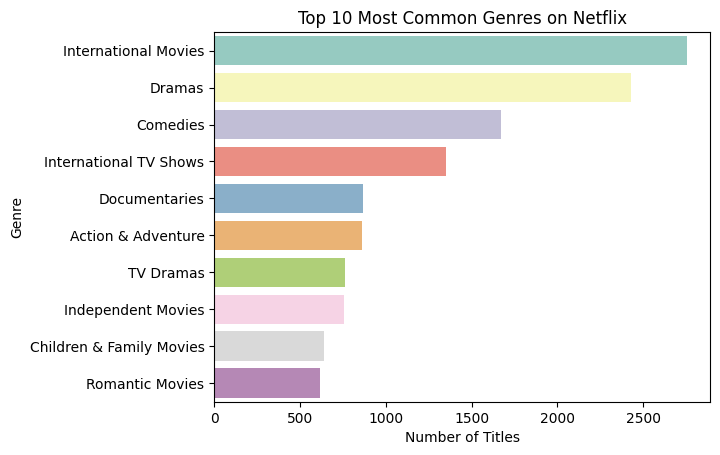

In [20]:
# Most Common Genres
print("""
This chart shows the top 10 most common genres available on Netflix.

I extracted genres from the 'listed_in' column by splitting multiple values into a list. Then I combined all the genre entries into one list and calculated how often each genre appears.

Using a barplot, I visualized the top 10 genres. From this chart, I can see that Drama, Documentaries, and Comedy are among the most popular content categories on the platform.

This gives insight into the types of shows and movies Netflix prioritizes, which could reflect user demand or strategic focus.
""")
df['genres'] = df['listed_in'].str.split(', ')
all_genres = sum(df['genres'], [])
top_genres = pd.Series(all_genres).value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set3')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


This chart shows how many titles were added to Netflix each year.

I used a countplot to visualize the number of new movies and TV shows added annually based on the 'year_added' column. Rotating the x-axis labels made the years easier to read.

From this chart, I noticed a steady increase in content additions over time, with a noticeable peak between 2018 and 2020. This suggests that Netflix ramped up its content acquisition or production during those years.

This trend reflects how Netflix has expanded its library over time to stay competitive and meet growing viewer demand.



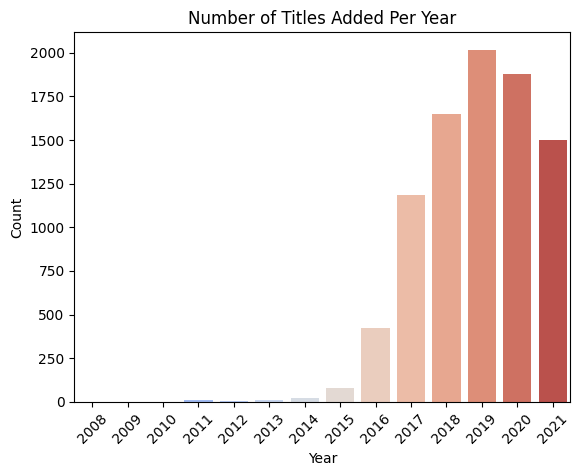

In [21]:
# Content Added Over the Years
print("""
This chart shows how many titles were added to Netflix each year.

I used a countplot to visualize the number of new movies and TV shows added annually based on the 'year_added' column. Rotating the x-axis labels made the years easier to read.

From this chart, I noticed a steady increase in content additions over time, with a noticeable peak between 2018 and 2020. This suggests that Netflix ramped up its content acquisition or production during those years.

This trend reflects how Netflix has expanded its library over time to stay competitive and meet growing viewer demand.
""")
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


This chart shows the top 10 countries that have contributed the most content to Netflix.

I used the 'country' column to count how many titles came from each country and selected the top 10. Then I used a horizontal bar chart to make the country names easy to read.

From the chart, I can see that the United States is by far the largest contributor, followed by countries like India, the United Kingdom, and Canada. This highlights which countries dominate Netflix’s content catalog.

It also gives insight into regional content strengths and where Netflix might consider investing or localizing more content.



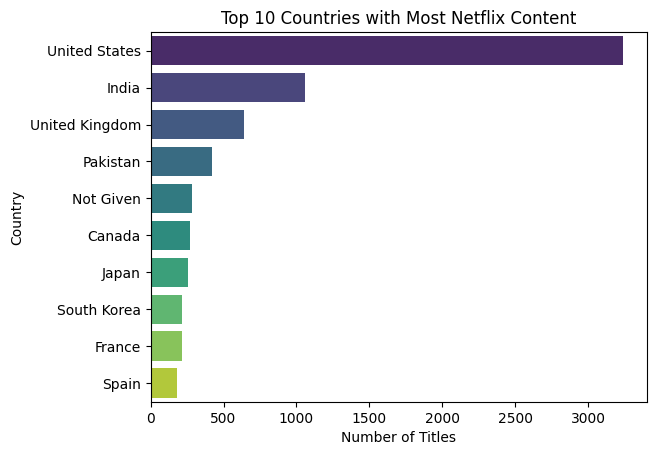

In [22]:
# Top 10 Countries with Most Content
print("""
This chart shows the top 10 countries that have contributed the most content to Netflix.

I used the 'country' column to count how many titles came from each country and selected the top 10. Then I used a horizontal bar chart to make the country names easy to read.

From the chart, I can see that the United States is by far the largest contributor, followed by countries like India, the United Kingdom, and Canada. This highlights which countries dominate Netflix’s content catalog.

It also gives insight into regional content strengths and where Netflix might consider investing or localizing more content.
""")
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


This chart shows how many movies and TV shows were added to Netflix in each month of the year.

I filtered the dataset by content type (Movie and TV Show), counted the number of releases by month, and then plotted both on the same line chart for comparison.

From this chart, I can see that Netflix releases new content throughout the year, but there are noticeable peaks in certain months — especially between March and October. These patterns may reflect seasonal release strategies or viewer demand trends.

Understanding monthly release behavior helps identify when Netflix tends to push new content and can support planning future launches.



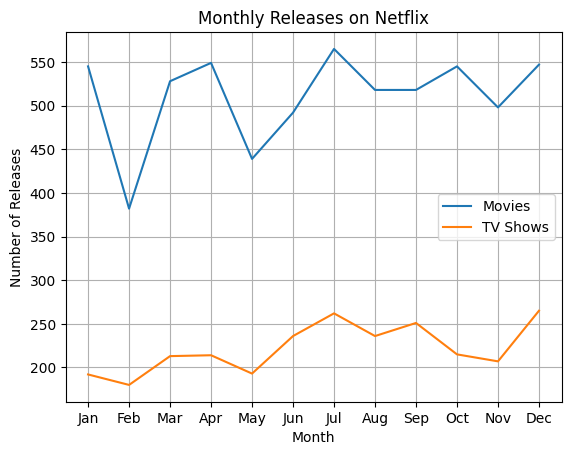

In [23]:
# Monthly Releases
print("""
This chart shows how many movies and TV shows were added to Netflix in each month of the year.

I filtered the dataset by content type (Movie and TV Show), counted the number of releases by month, and then plotted both on the same line chart for comparison.

From this chart, I can see that Netflix releases new content throughout the year, but there are noticeable peaks in certain months — especially between March and October. These patterns may reflect seasonal release strategies or viewer demand trends.

Understanding monthly release behavior helps identify when Netflix tends to push new content and can support planning future launches.
""")
monthly_movie = df[df['type']=='Movie']['month_added'].value_counts().sort_index()
monthly_tv = df[df['type']=='TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.legend()
plt.grid(True)
plt.show()


This chart shows the top 10 directors who have the most content available on Netflix.

I used the 'director' column to count how many titles each director has contributed and then visualized the top 10 using a horizontal bar chart for better readability.

From this chart, I can see that a few directors have a significantly larger presence on the platform. This could be due to their work on multiple projects, franchise contributions, or regional popularity.

This analysis helps highlight key creators in Netflix’s content catalog and can guide decisions around partnerships, promotions, or featured collections.



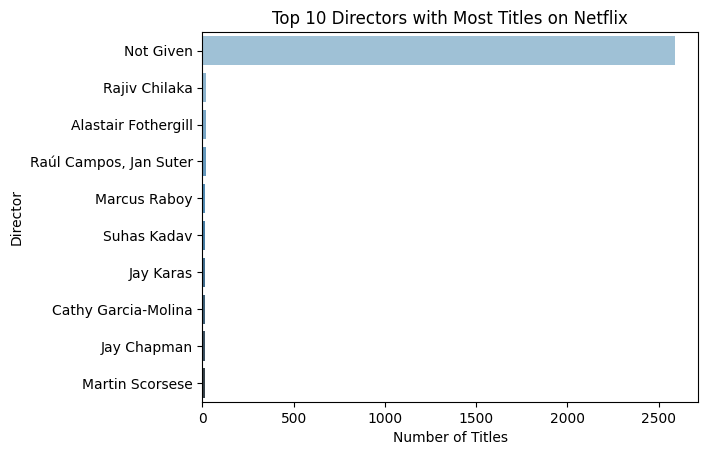

In [24]:
# Top Directors
print("""
This chart shows the top 10 directors who have the most content available on Netflix.

I used the 'director' column to count how many titles each director has contributed and then visualized the top 10 using a horizontal bar chart for better readability.

From this chart, I can see that a few directors have a significantly larger presence on the platform. This could be due to their work on multiple projects, franchise contributions, or regional popularity.

This analysis helps highlight key creators in Netflix’s content catalog and can guide decisions around partnerships, promotions, or featured collections.
""")
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


This word cloud shows the most frequently used words in Netflix titles.

I combined all the title names into a single string and generated the word cloud using the WordCloud library. The larger a word appears, the more frequently it shows up in the titles.

From this visualization, I can quickly identify common themes in Netflix content — words like 'Love', 'Life', or 'Story' tend to appear often, reflecting recurring topics or genres.

This gives a creative and high-level overview of how Netflix brands and markets its shows and movies.



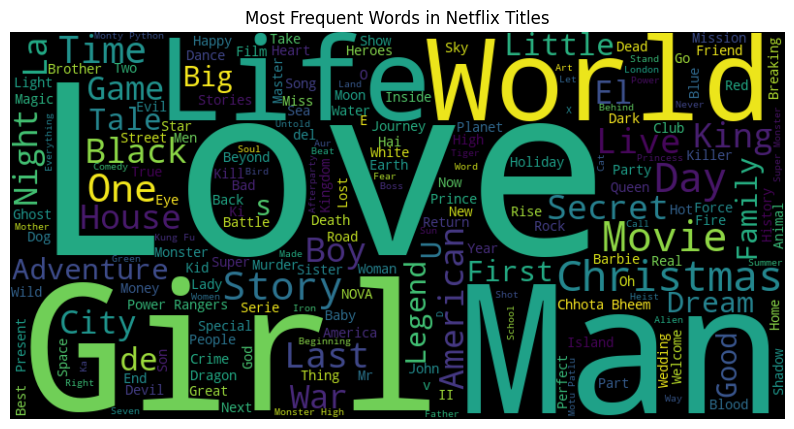

In [25]:
# Word Cloud of Titles
print("""
This word cloud shows the most frequently used words in Netflix titles.

I combined all the title names into a single string and generated the word cloud using the WordCloud library. The larger a word appears, the more frequently it shows up in the titles.

From this visualization, I can quickly identify common themes in Netflix content — words like 'Love', 'Life', or 'Story' tend to appear often, reflecting recurring topics or genres.

This gives a creative and high-level overview of how Netflix brands and markets its shows and movies.
""")
text = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Netflix Titles")
plt.show()


This treemap shows the breakdown of Netflix content by country and type — whether it's a Movie or a TV Show.

Each rectangle represents a country, and the size corresponds to the number of titles (based on 'release_year' counts used as a proxy). Inside each country, the content is further divided into Movies and TV Shows.

The color gradient represents the release years, helping to show which regions are producing newer vs. older content.

This visual gives a quick and intuitive overview of how Netflix's global content is distributed and what types of shows dominate in different countries.



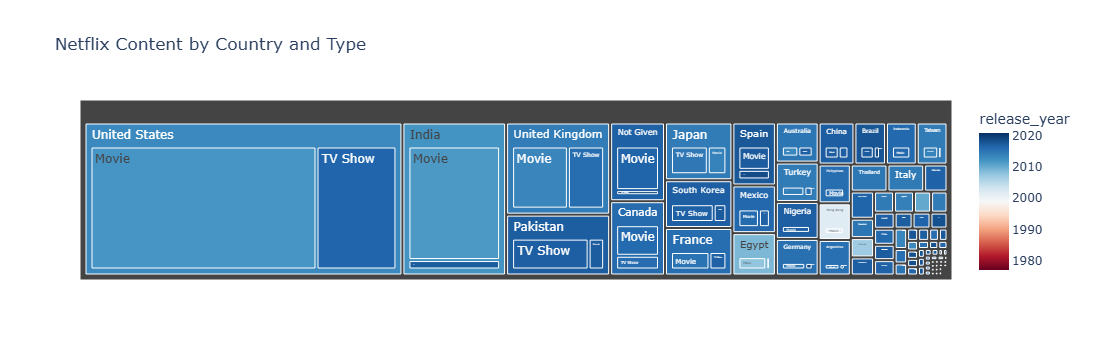

In [26]:
# Treemap of Content by Country and Type
print("""
This treemap shows the breakdown of Netflix content by country and type — whether it's a Movie or a TV Show.

Each rectangle represents a country, and the size corresponds to the number of titles (based on 'release_year' counts used as a proxy). Inside each country, the content is further divided into Movies and TV Shows.

The color gradient represents the release years, helping to show which regions are producing newer vs. older content.

This visual gives a quick and intuitive overview of how Netflix's global content is distributed and what types of shows dominate in different countries.
""")
fig = px.treemap(df, path=['country', 'type'], values='release_year', color='release_year',
                 color_continuous_scale='RdBu', title='Netflix Content by Country and Type')
fig.show()


This chart shows the top 10 content ratings used on Netflix, like TV-MA, PG, or R.

I counted how many titles fall into each rating category and visualized the results using a horizontal bar chart.

From this chart, I can see that TV-MA is the most common rating, followed by TV-14 and TV-PG. This suggests that a large portion of Netflix’s catalog is geared toward mature or older teen audiences.

This kind of analysis helps understand Netflix's audience targeting and content classification strategy.



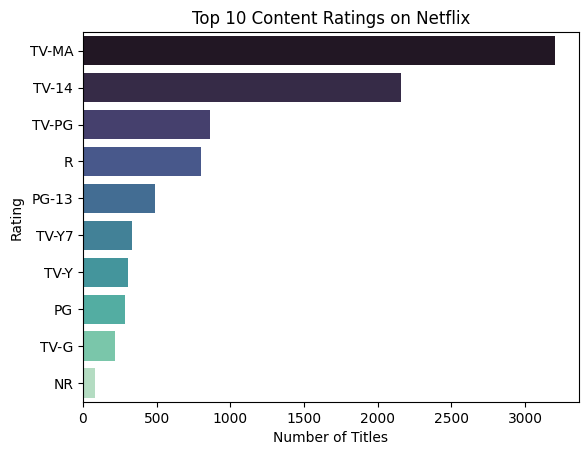

In [27]:
# Distribution of Ratings
print("""
This chart shows the top 10 content ratings used on Netflix, like TV-MA, PG, or R.

I counted how many titles fall into each rating category and visualized the results using a horizontal bar chart.

From this chart, I can see that TV-MA is the most common rating, followed by TV-14 and TV-PG. This suggests that a large portion of Netflix’s catalog is geared toward mature or older teen audiences.

This kind of analysis helps understand Netflix's audience targeting and content classification strategy.
""")
rating_counts = df['rating'].value_counts().head(10)
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='mako')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


This chart shows the distribution of movie durations on Netflix.

I filtered the dataset to include only movies, then extracted the numeric part of the 'duration' column to get duration in minutes. Using a histogram with a KDE curve, I visualized how long most Netflix movies typically are.

From this chart, I can see that the majority of movies fall between 80 and 110 minutes. This aligns with standard feature-length films and suggests Netflix focuses on content that fits within this typical viewing range.

This analysis gives insight into content length strategy and how it may relate to viewer engagement.



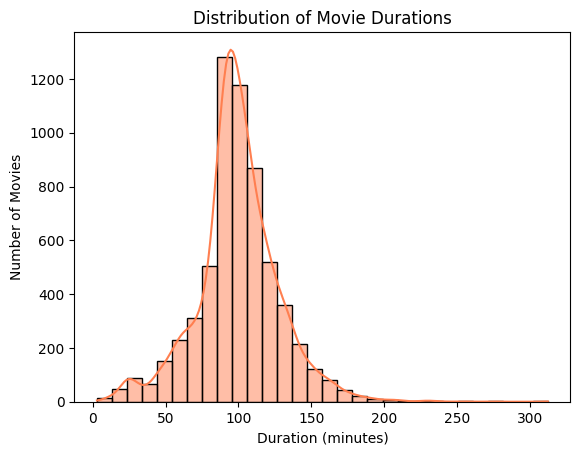

In [28]:
# Duration Analysis
print("""
This chart shows the distribution of movie durations on Netflix.

I filtered the dataset to include only movies, then extracted the numeric part of the 'duration' column to get duration in minutes. Using a histogram with a KDE curve, I visualized how long most Netflix movies typically are.

From this chart, I can see that the majority of movies fall between 80 and 110 minutes. This aligns with standard feature-length films and suggests Netflix focuses on content that fits within this typical viewing range.

This analysis gives insight into content length strategy and how it may relate to viewer engagement.
""")
movies = df[df['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
sns.histplot(movies['duration_min'], bins=30, kde=True, color='coral')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()

In [35]:
# Summary & Conclusion
print("""
Summary:
- I began by cleaning the dataset, removing duplicates, and handling missing values where appropriate.
- I created a quick KPI snapshot to highlight total titles, Movies vs TV Shows, top countries, and most frequent genres.
- I explored the distribution of content types, genre popularity, ratings, country-level contributions, and release timelines.
- I added interactive visualizations and calculated average movie durations by genre to highlight viewer engagement patterns.

Conclusion:
- Netflix’s catalog is heavily skewed toward Movies, with Drama, Documentaries, and Comedy as leading genres.
- The most frequent maturity rating is TV-MA, indicating a strategic focus on mature audiences.
- The majority of movie durations fall between 80 and 100 minutes — ideal for holding viewer attention.
- Content additions peaked between 2018 and 2020, reflecting Netflix’s expansion phase.

These insights directly support content acquisition planning, viewer targeting, and strategic regional growth.
""")
# Future Enhancement
print("""
Based on my analysis, I’ve identified several business-focused enhancements that can help Netflix make smarter, data-driven decisions moving forward:

1. 📊 Build an Interactive Executive Dashboard  
Develop a dashboard where leadership can filter content by genre, country, release year, and rating. This enables real-time, visual decision support for planning and investments.

2. 🎯 Integrate Content ROI and Engagement Metrics  
Link this dataset with internal viewership and retention metrics to prioritize content that drives the most engagement and long-term value.

3. 🌍 Identify Market Gaps for Strategic Expansion  
Analyze country-level data to detect underserved regions. These insights can guide regional content investments or local production deals.

4. 🔮 Forecast Genre Trends Using Machine Learning  
Use past content trends to build models that predict emerging genres or formats. This can help Netflix stay ahead of changing viewer behavior.

5. 💼 Align Content with Subscriber Tiers  
Combine content insights with subscription data (e.g., Basic, Premium) to understand which content drives upgrades or loyalty — enabling better bundling and personalization.

📌 Together, these enhancements turn this project into a strategic asset that can guide Netflix’s global growth, improve ROI on content, and deliver a more personalized viewer experience.
""")


Summary:
- I began by cleaning the dataset, removing duplicates, and handling missing values where appropriate.
- I created a quick KPI snapshot to highlight total titles, Movies vs TV Shows, top countries, and most frequent genres.
- I explored the distribution of content types, genre popularity, ratings, country-level contributions, and release timelines.
- I added interactive visualizations and calculated average movie durations by genre to highlight viewer engagement patterns.

Conclusion:
- Netflix’s catalog is heavily skewed toward Movies, with Drama, Documentaries, and Comedy as leading genres.
- The most frequent maturity rating is TV-MA, indicating a strategic focus on mature audiences.
- The majority of movie durations fall between 80 and 100 minutes — ideal for holding viewer attention.
- Content additions peaked between 2018 and 2020, reflecting Netflix’s expansion phase.

These insights directly support content acquisition planning, viewer targeting, and strategic regiona